Data Analysis and Visualization of Movie Data using Python
We are first going to import all the necessary libraries and the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
data = pd.read_csv('/Users/nithinsrivatsa/Downloads/movie_profit.csv')

In [2]:
data.head()

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre
0,1,6/22/2007,Evan Almighty,175000000.0,100289690.0,1.741313e+08,Universal,PG,Comedy
1,2,7/28/1995,Waterworld,175000000.0,88246220.0,2.642462e+08,Universal,PG-13,Action
2,3,5/12/2017,King Arthur: Legend of the Sword,175000000.0,39175066.0,1.399507e+08,Warner Bros.,PG-13,Adventure
3,4,12/25/2013,47 Ronin,175000000.0,38362475.0,1.517168e+08,Universal,PG-13,Action
4,5,6/22/2018,Jurassic World: Fallen Kingdom,170000000.0,416769345.0,1.304866e+09,Universal,PG-13,Action


We see that there is an unnecessary column called Unnamed:0 above, so we are going to drop it and ensure that the changes are made to the actual dataframe.

In [3]:
data.drop(columns = ('Unnamed: 0'), inplace = True)

In [4]:
data.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre
0,6/22/2007,Evan Almighty,175000000.0,100289690.0,1.741313e+08,Universal,PG,Comedy
1,7/28/1995,Waterworld,175000000.0,88246220.0,2.642462e+08,Universal,PG-13,Action
2,5/12/2017,King Arthur: Legend of the Sword,175000000.0,39175066.0,1.399507e+08,Warner Bros.,PG-13,Adventure
3,12/25/2013,47 Ronin,175000000.0,38362475.0,1.517168e+08,Universal,PG-13,Action
4,6/22/2018,Jurassic World: Fallen Kingdom,170000000.0,416769345.0,1.304866e+09,Universal,PG-13,Action


Now, we can see that the data is much cleaner.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401 entries, 0 to 3400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       3401 non-null   object 
 1   movie              3401 non-null   object 
 2   production_budget  3401 non-null   float64
 3   domestic_gross     3401 non-null   float64
 4   worldwide_gross    3401 non-null   float64
 5   distributor        3353 non-null   object 
 6   mpaa_rating        3264 non-null   object 
 7   genre              3401 non-null   object 
dtypes: float64(3), object(5)
memory usage: 212.7+ KB


In [6]:
data.isnull().sum()

release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
distributor           48
mpaa_rating          137
genre                  0
dtype: int64

We see that there are a small number of null values in the distributor and mpaa_rating columns. Since these rows are not going to make a huge impact on the overall dataset, we are going to drop them.

In [7]:
data.dropna(inplace = True)

In [8]:
data.isnull().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
distributor          0
mpaa_rating          0
genre                0
dtype: int64

Now the dataset has no missing values while retaining a majority of the values. Let's also check for and deal with duplicate values, if any.

In [10]:
data.duplicated().sum()

0

Since there are no duplicates, let's begin the Exploratory Data Analysis.
We are first going to obtain some distributions of data by genre

In [12]:
data["genre"].value_counts()

genre
Drama        1180
Comedy        775
Action        540
Adventure     469
Horror        266
Name: count, dtype: int64

In [17]:
genre_by_domestic_gross = data.groupby("genre")["domestic_gross"].mean()

In [18]:
genre_by_domestic_gross.sort_values(ascending= False)

genre
Adventure    8.714000e+07
Action       6.474280e+07
Comedy       4.167048e+07
Horror       3.804494e+07
Drama        2.917919e+07
Name: domestic_gross, dtype: float64

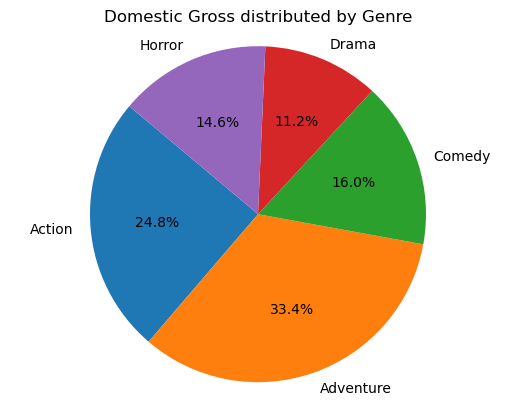

In [23]:
labels= genre_by_domestic_gross.index
sizes= genre_by_domestic_gross.values

plt.pie(sizes, labels= labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Domestic Gross distributed by Genre")
plt.show()

We see that Action and Adventure account for more than half the Domestic Gross Earnings!

Next, let's explore the MPAA Ratings. Here is some context on the ratings:

G: All audiences without any parental supervision needed.

PG: Parental Guidance suggested.

PG-13: Parents Strongly cautioned.

R: Restricted for all ages below 17 without an adult guardian.

In [25]:
mpaa_ratings= data.groupby("mpaa_ratings")["domestic_gross"].sum()

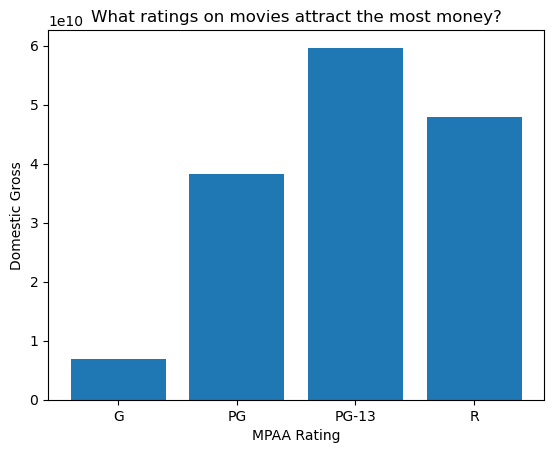

In [32]:
ratings= mpaa_ratings.index
gross_sum= mpaa_ratings.values
plt.bar(ratings, gross_sum)
plt.xlabel("MPAA Rating")
plt.ylabel("Domestic Gross")
plt.title("What ratings on movies attract the most money?")
plt.show()

We see that PG-13 and R movies make more money than PG and G movies. Let's now calculate ROI by genre and rating.

In [33]:
data["worldwide_ROI"] = data["worldwide_gross"]/ data["production_budget"]

In [35]:
data["domestic_ROI"] = data["domestic_gross"]/ data["production_budget"]

In [60]:
data.head()


,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,worldwide_ROI,domestic_ROI
0,6/22/2007,Evan Almighty,175000000.0,100289690.0,1.741313e+08,Universal,PG,Comedy,0.995036,0.573084
1,7/28/1995,Waterworld,175000000.0,88246220.0,2.642462e+08,Universal,PG-13,Action,1.509978,0.504264
2,5/12/2017,King Arthur: Legend of the Sword,175000000.0,39175066.0,1.399507e+08,Warner Bros.,PG-13,Adventure,0.799718,0.223858
3,12/25/2013,47 Ronin,175000000.0,38362475.0,1.517168e+08,Universal,PG-13,Action,0.866953,0.219214
4,6/22/2018,Jurassic World: Fallen Kingdom,170000000.0,416769345.0,1.304866e+09,Universal,PG-13,Action,7.675684,2.451584


***We have now computed the ROI's domestically and internationally. Grouping by Genre, Release data and MPAA ratings should yield some interesting results!***

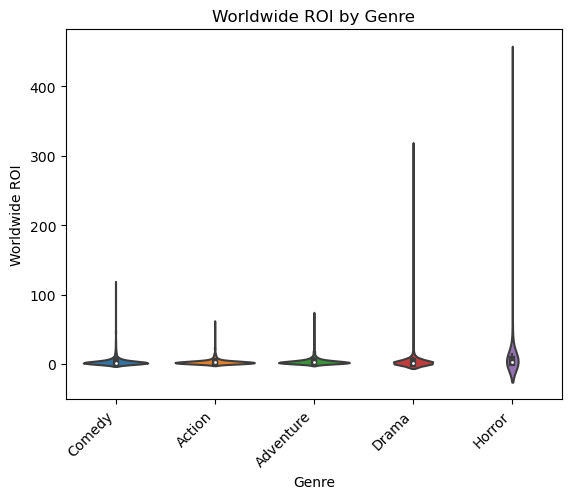

In [45]:
sns.violinplot(x=data['genre'], y=data['worldwide_ROI'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Genre')
plt.ylabel('Worldwide ROI')
plt.title('Worldwide ROI by Genre')
plt.show()

This violin plot can be interpreted as follows: Comedy, Action and Adventure have pretty wide values close to 0. This means that there have been many movies in this genre which have not been very successful.
Horror and Drama have thinner violins but they are much larger. This means that there is more variance in this data and that amongst the movies with the highest ever ROIs, they have been in this genre.
This is likely because they do not attract large budgets, but are still beloved by crowds, leading to such massive outliers. Does this also hold true for domestic ROI? Let's find out below.

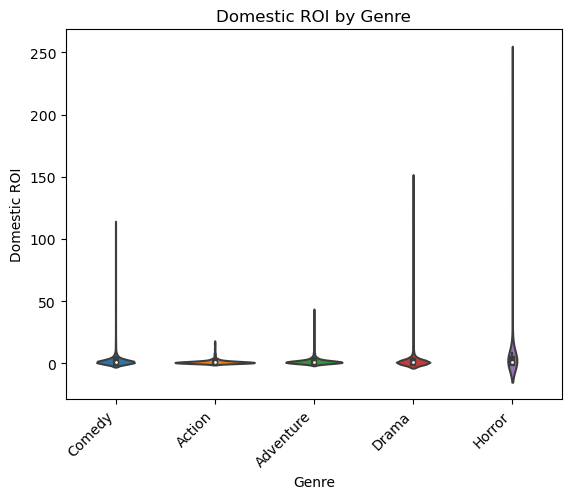

In [46]:
sns.violinplot(x=data['genre'], y=data['domestic_ROI'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Genre')
plt.ylabel('Domestic ROI')
plt.title('Domestic ROI by Genre')
plt.show()

Domestically, we see that Comedy fares a bit better, but the trends remain true. The best and more volatile ROI spreads come from Drama and Horror.

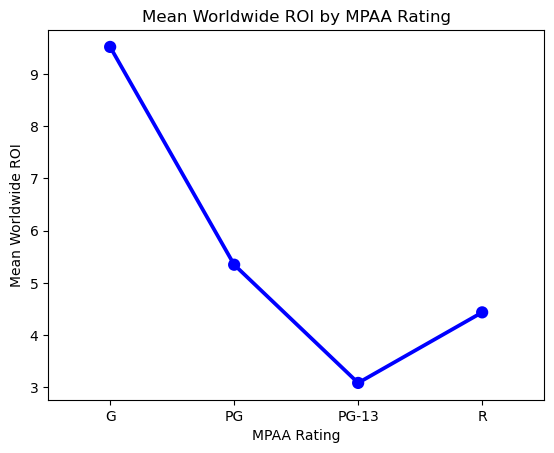

In [58]:
worldwide_ROI_by_rating = data.groupby("mpaa_rating")["worldwide_ROI"].mean().reset_index()

# Create point plot
sns.pointplot(x='mpaa_rating', y='worldwide_ROI', data=worldwide_ROI_by_rating, color='blue')
plt.xlabel("MPAA Rating")
plt.ylabel("Mean Worldwide ROI")
plt.title("Mean Worldwide ROI by MPAA Rating")
plt.show()


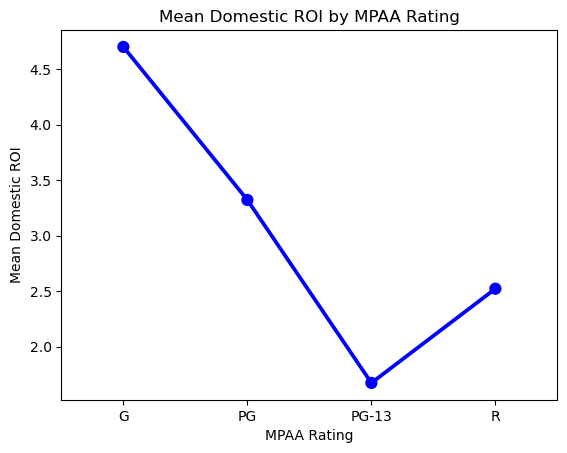

In [65]:
domestic_ROI_by_rating = data.groupby("mpaa_rating")["domestic_ROI"].mean().reset_index()

# Create point plot
sns.pointplot(x='mpaa_rating', y='domestic_ROI', data=domestic_ROI_by_rating, color='blue')
plt.xlabel("MPAA Rating")
plt.ylabel("Mean Domestic ROI")
plt.title("Mean Domestic ROI by MPAA Rating")
plt.show()

PG-13 movies appear to struggle the most, whereas G and PG rated movies are doing better, with R rated movies right in between.
Next, let's identify some low points for Hollywood, by calculating which years had the worst performing movies, with ROI less than 0.5 (i.e less than 50% of the production budget returned)

In [113]:
low_ROI_movies = data[data["worldwide_ROI"] <= 0.5]
low_ROI_count_by_decade = low_ROI_movies["decade"].value_counts().reset_index()
low_ROI_count_by_decade.columns = ['decade', 'count']
print(low_ROI_count_by_decade)

   decade  count
0    2000    243
1    2010    197
2    1990    108
3    1980      7
4    1960      1
5    1970      1
6    1930      1


In [69]:
data["release_date"] = pd.to_datetime(data["release_date"])
data["decade"] = (data["release_date"].dt.year // 10) * 10
mean_worldwide_ROI_by_decade = data.groupby("decade")["worldwide_ROI"].mean()
mean_worldwide_ROI_by_year.head()

decade
1930     50.122349
1940    119.749476
1950     10.091333
1960     14.351514
1970     33.555592
Name: worldwide_ROI, dtype: float64

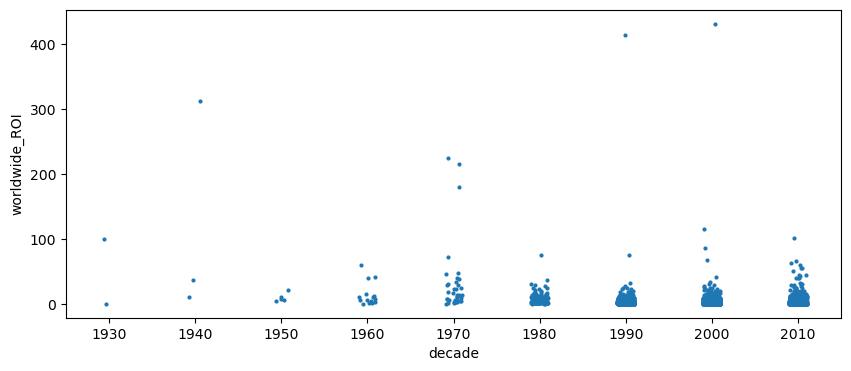

In [77]:
plt.figure(figsize = (10,4))
sns.stripplot(x = "decade", y = "worldwide_ROI", data= data, size = 3, jitter= True)
plt.xlabel = "decade"
plt.ylabel = "Worldwide Gross ROI"
plt.title = "Which decade provided the best worldwide ROI to Hollywood?"
plt.show()

We see that the 1970s and 2000s appear to be some great decades for Hollywood. This is interesting because the 2000s also have some of the worst performing movies. Seems to have been a very volatile year for Hollywood!